In [28]:
import quandl
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

quandl.ApiConfig.api_key = 'm-LdbzS2APoyeamXaxcm'
df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]

In [7]:
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


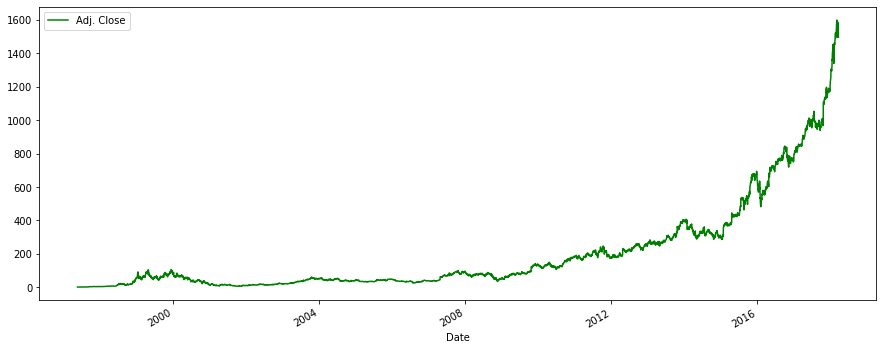

In [13]:
df['Adj. Close'].plot(figsize = (15,6), color = 'g')
plt.legend(loc = 'upper left')
plt.show()

In [20]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)
X_forecast = X[-forecast:]
X = X[:-forecast]
y = np.array(df['Prediction'])
y = y[:-forecast]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1499.98115206 1538.8175207  1550.20059426 1536.3092057  1557.20474503
 1572.6904016  1574.64603702 1590.84379997 1614.17325512 1603.57668711
 1604.07622442 1583.88216301 1591.1095113  1615.93757838 1630.84929847
 1638.67184015 1645.96295917 1674.69166864 1695.41715272 1684.56550183
 1687.56272568 1678.33722815 1667.02855376 1638.59744098 1682.79055011
 1677.84831929 1637.71527935 1586.12476667 1650.21434052 1587.70840622]


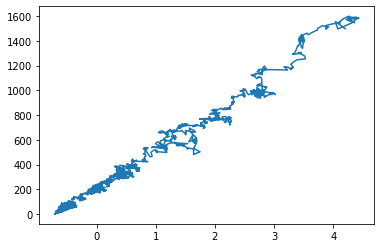

In [22]:
plt.plot(X, y)

(17282.0, 18029.5)

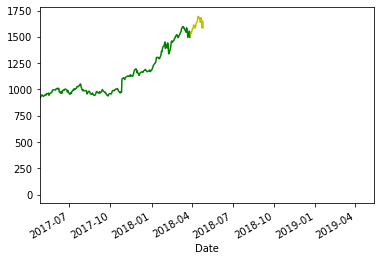

In [29]:
dates = pd.date_range(start="2018-03-28", end = "2018-4-26")
plt.plot(dates, forecast_predicted, color = 'y')
df['Adj. Close'].plot(color = 'g')
plt.xlim(xmin = datetime.date(2017,4,26))